In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [80]:
data = pd.read_csv('data/measurements.csv')
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [81]:
data2=pd.read_excel('data/measurements2.xlsx')

In [82]:
data2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


we see data and data2 are the same but with different format so we just keep data for working

In [83]:
print(f"data shape = {data.shape}, data2 shape = {data2.shape}")

data shape = (388, 12), data2 shape = (388, 12)


### DATA EXPLORATION AND TRANSFORMATION

In [84]:
data.sample()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
307,"11,9","5,3",34,22,13,NaN,SP98,0,0,0,NaN,NaN


In [85]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

refill liters and refill gass are almost all NaN (375 out of 388), so, we will not be able to ge representative information from these columns. We can drop them 

In [86]:
data.drop(columns= ['refill liters' , 'refill gas'], inplace= True)

In [87]:
data['specials'].value_counts()

specials
rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: count, dtype: int64

regarding the 'specials' column we see it is information regarding AC and/or rain/snow. We already have 3 columns with this info ('AC', 'rain' , 'sun') with no NaN so, we can drop this column too as it contains no relevant information

In [88]:
data.drop(columns= 'specials', inplace= True)

In [89]:
data.dtypes

distance        object
consume         object
speed            int64
temp_inside     object
temp_outside     int64
gas_type        object
AC               int64
rain             int64
sun              int64
dtype: object

distance, consume, temp_inside are objects so we must turn them into numbers to be able to work with this data.

In [90]:
data['distance'] = data['distance'].apply(lambda x: float(x.replace(',','.')))

In [91]:
data['consume'] = data['consume'].apply(lambda x: float(x.replace(',','.')))

In [97]:
data['temp_inside'] = data['temp_inside'].apply(lambda x: float(x.replace(',','.')) if type(x) == str else x)

In [99]:
data.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
AC                int64
rain              int64
sun               int64
dtype: object

In [100]:
# this is how our dataframe is looking now:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


### DATA VISUALIZATION

let's see how many data we have for each fuel:

In [154]:
data['gas_type'].value_counts()

gas_type
SP98    228
E10     160
Name: count, dtype: int64

<Axes: ylabel='consume'>

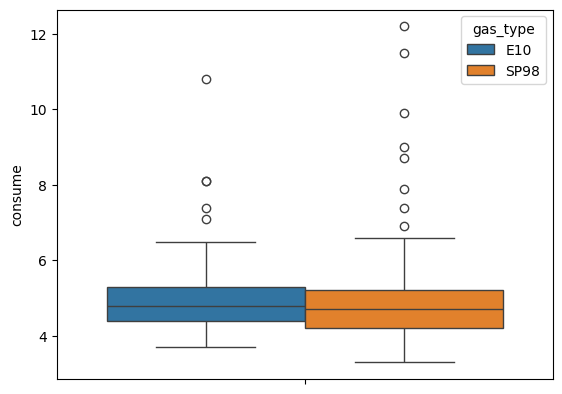

In [153]:
sns.boxplot(data = data, y ='consume', hue = 'gas_type')

there are some very high values but they do not seem to be correlated with the fuel type. It is important to remove outliers to be able to get good predictions/conclusions.

In [159]:
def remove_outliers(df, column):
    ''' removes rows containing outliers from a dataframe based on a column values
    agrgs:
    df (DataFrame) : the imput dataframe
    column (str) : name of the column containing the outliers

    returns: the dataframe with outliers removed
    '''
    q1= df['consume'].quantile(0.25)
    q2 = df['consume'].quantile(0.5)
    q3 = df['consume'].quantile(0.75)
    int_quantiles = q3-q1
    max = q3+1.5*int_quantiles
    min = q1-1.5*int_quantiles
    df.drop(df[(df[column] > max)|(df[column] < min)].index, inplace = True)
    return df



In [160]:
remove_outliers(data,'consume')

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0
